In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="darkgrid")
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

demo = pd.read_csv('demos.csv')
email = pd.read_csv('email.csv')

C:\Users\ferzi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
email

,part_id,click_dt,bounce_dt,open_dt
0,1054161513,NaN,NaN,NaN
1,5761909860,NaN,NaN,NaN
2,9130086586,NaN,NaN,NaN
3,5496433327,NaN,NaN,NaN
4,8917877079,NaN,NaN,12/14/2020 0:00
...,...,...,...,...
41762,139438696,NaN,NaN,NaN
41763,8080126468,1/6/2021,NaN,11/26/2020
41764,9805524809,NaN,NaN,NaN
41765,767386300,NaN,NaN,NaN


In [3]:
demo.describe()

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,status,campaign
count,4.176700e+04,41767.000000,41767.000000,41767.000000,41767.000000,41767.000000,41767.000000,41767.000000,41767.000000,41767.000000
mean,4.999553e+09,6.291474,12.041301,1.147221,60046.147449,6.007113,44.999588,0.272703,0.371561,0.735916
std,2.890176e+09,0.752298,1.091707,1.053628,15031.505233,1.001498,0.914382,0.445409,0.483871,0.639023
min,1.332140e+05,5.000000,10.000000,0.000000,-7984.650000,1.700000,42.700000,0.000000,0.000000,0.000000
25%,2.509040e+09,6.000000,11.000000,0.000000,49879.165000,5.300000,44.300000,0.000000,0.000000,0.000000
50%,5.010379e+09,6.000000,12.000000,2.000000,60043.100000,6.000000,44.800000,0.000000,0.000000,1.000000
75%,7.506106e+09,7.000000,13.000000,2.000000,70151.315000,6.700000,45.700000,1.000000,1.000000,1.000000
max,9.999918e+09,12.000000,19.000000,5.000000,126301.310000,10.000000,48.900000,2.000000,3.000000,2.000000


In [4]:
# for a in email.index:
#     if type(email.iloc[a]['click_dt']) != float:
#         email.iloc[a]['clicked'] = 1
#     else:
#         email.iloc[a]['clicked']  = 0
        
# for a in email.index:
#     if type(email.iloc[a]['bounce_dt']) != float:
#         email.iloc[a]['bounced'] = 1
#     else:
#         email.iloc[a]['bounced']  = 0

# for a in email.index:
#     if type(email.iloc[a]['open_dt']) != float:
#         email.iloc[a]['opened'] = 1
#     else:
#         email.iloc[a]['opened']  = 0


In [5]:
email['click_dt'].fillna('', inplace=True)
email['bounce_dt'].fillna('', inplace=True)
email['open_dt'].fillna('', inplace=True)
email

,part_id,click_dt,bounce_dt,open_dt
0,1054161513,,,
1,5761909860,,,
2,9130086586,,,
3,5496433327,,,
4,8917877079,,,12/14/2020 0:00
...,...,...,...,...
41762,139438696,,,
41763,8080126468,1/6/2021,,11/26/2020
41764,9805524809,,,
41765,767386300,,,


In [6]:
temp_clicked_zero = email[email["click_dt"].isin([''])]
temp_clicked_zero['clicked'] = 0

temp_clicked_one = email[~email["click_dt"].isin([''])]
temp_clicked_one['clicked'] = 1

email = temp_clicked_one.append(temp_clicked_zero)
email

,part_id,click_dt,bounce_dt,open_dt,clicked
6,2057483407,1/10/2021 0:00,,12/16/2020 0:00,1
14,9493848431,1/19/2021 0:00,,10/19/2020 0:00,1
19,8045991761,12/5/2020 0:00,,11/19/2020 0:00,1
27,4167117965,2/9/2021 0:00,,1/23/2021 0:00,1
35,6309617720,1/8/2021 0:00,,12/22/2020 0:00,1
...,...,...,...,...,...
41759,27682234,,,8/15/2020,0
41760,6202893508,,,9/20/2020,0
41762,139438696,,,,0
41764,9805524809,,,,0


In [7]:
temp_bounced_zero = email[email["bounce_dt"].isin([''])]
temp_bounced_zero['bounced'] = 0

temp_bounced_one = email[~email["bounce_dt"].isin([''])]
temp_bounced_one['bounced'] = 1

email = temp_bounced_one.append(temp_bounced_zero)
email

,part_id,click_dt,bounce_dt,open_dt,clicked,bounced
3342,9576372771,2/9/2021 0:00,7/30/2020 5:30,1/13/2021 0:00,1,1
3762,9428035314,1/14/2021 0:00,7/30/2020 5:30,10/20/2020 0:00,1,1
4475,6483195957,1/25/2021 0:00,7/30/2020 5:30,9/22/2020 0:00,1,1
8773,8890838825,1/8/2021 0:00,7/30/2020 5:30,11/12/2020 0:00,1,1
11895,929930576,12/5/2020 0:00,8/25/2020 7:55,9/19/2020 0:00,1,1
...,...,...,...,...,...,...
41759,27682234,,,8/15/2020,0,0
41760,6202893508,,,9/20/2020,0,0
41762,139438696,,,,0,0
41764,9805524809,,,,0,0


In [8]:
temp_opened_zero = email[email["open_dt"].isin([''])]
temp_opened_zero['opened'] = 0

temp_opened_one = email[~email["open_dt"].isin([''])]
temp_opened_one['opened'] = 1

email = temp_opened_one.append(temp_opened_zero)
email

,part_id,click_dt,bounce_dt,open_dt,clicked,bounced,opened
3342,9576372771,2/9/2021 0:00,7/30/2020 5:30,1/13/2021 0:00,1,1,1
3762,9428035314,1/14/2021 0:00,7/30/2020 5:30,10/20/2020 0:00,1,1,1
4475,6483195957,1/25/2021 0:00,7/30/2020 5:30,9/22/2020 0:00,1,1,1
8773,8890838825,1/8/2021 0:00,7/30/2020 5:30,11/12/2020 0:00,1,1,1
11895,929930576,12/5/2020 0:00,8/25/2020 7:55,9/19/2020 0:00,1,1,1
...,...,...,...,...,...,...,...
41755,9353727573,,,,0,0,0
41757,7229258722,,,,0,0,0
41762,139438696,,,,0,0,0
41764,9805524809,,,,0,0,0


In [9]:
final = demo.merge(email, how = 'left', left_on = 'part_id', right_on = 'part_id')
final

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,status,campaign,click_dt,bounce_dt,open_dt,clicked,bounced,opened
0,1054161513,6,11,1,70377.57,6.0,44.2,0,0,0,,,,0,0,0
1,5761909860,7,13,2,63505.69,6.6,44.2,0,1,1,,,,0,0,0
2,9130086586,6,13,2,55933.94,5.9,43.7,1,0,1,,,,0,0,0
3,5496433327,6,12,2,81072.63,5.5,45.5,0,1,1,,,,0,0,0
4,8917877079,8,12,0,87534.41,3.8,45.3,1,0,0,,,12/14/2020 0:00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41762,139438696,7,14,1,73981.75,5.4,47.0,0,0,2,,,,0,0,0
41763,8080126468,7,12,0,83325.66,7.4,46.1,0,1,2,1/6/2021,,11/26/2020,1,0,1
41764,9805524809,7,15,0,46040.38,3.2,47.2,0,0,2,,,,0,0,0
41765,767386300,5,12,0,60608.12,6.7,45.7,0,0,2,,,,0,0,0


In [10]:
final['click_dt']= pd.to_datetime(final['click_dt'])
final['bounce_dt']= pd.to_datetime(final['bounce_dt'])
final['open_dt']= pd.to_datetime(final['open_dt'])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41767 entries, 0 to 41766
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   part_id    41767 non-null  int64         
 1   fund_ct    41767 non-null  int64         
 2   logon_ct   41767 non-null  int64         
 3   call_ct    41767 non-null  int64         
 4   balance    41767 non-null  float64       
 5   tenure     41767 non-null  float64       
 6   age        41767 non-null  float64       
 7   gender     41767 non-null  int64         
 8   status     41767 non-null  int64         
 9   campaign   41767 non-null  int64         
 10  click_dt   10507 non-null  datetime64[ns]
 11  bounce_dt  31 non-null     datetime64[ns]
 12  open_dt    21020 non-null  datetime64[ns]
 13  clicked    41767 non-null  int64         
 14  bounced    41767 non-null  int64         
 15  opened     41767 non-null  int64         
dtypes: datetime64[ns](3), float64(3), int64(

In [11]:
final

,part_id,fund_ct,logon_ct,call_ct,balance,tenure,age,gender,status,campaign,click_dt,bounce_dt,open_dt,clicked,bounced,opened
0,1054161513,6,11,1,70377.57,6.0,44.2,0,0,0,NaT,NaT,NaT,0,0,0
1,5761909860,7,13,2,63505.69,6.6,44.2,0,1,1,NaT,NaT,NaT,0,0,0
2,9130086586,6,13,2,55933.94,5.9,43.7,1,0,1,NaT,NaT,NaT,0,0,0
3,5496433327,6,12,2,81072.63,5.5,45.5,0,1,1,NaT,NaT,NaT,0,0,0
4,8917877079,8,12,0,87534.41,3.8,45.3,1,0,0,NaT,NaT,2020-12-14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41762,139438696,7,14,1,73981.75,5.4,47.0,0,0,2,NaT,NaT,NaT,0,0,0
41763,8080126468,7,12,0,83325.66,7.4,46.1,0,1,2,2021-01-06,NaT,2020-11-26,1,0,1
41764,9805524809,7,15,0,46040.38,3.2,47.2,0,0,2,NaT,NaT,NaT,0,0,0
41765,767386300,5,12,0,60608.12,6.7,45.7,0,0,2,NaT,NaT,NaT,0,0,0


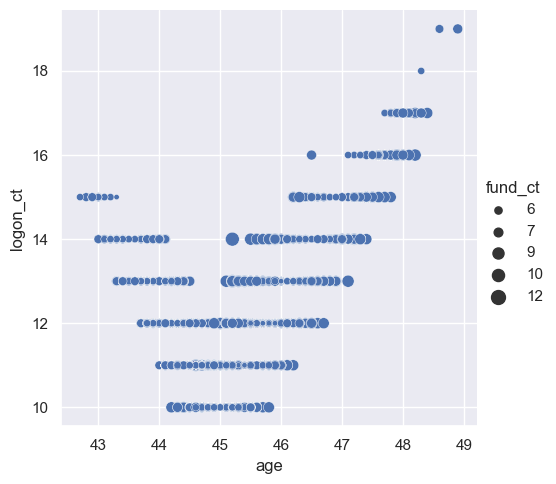

In [36]:
sns.relplot(data=final, x = "age", y = "logon_ct", size = "fund_ct", sizes=(15, 100))

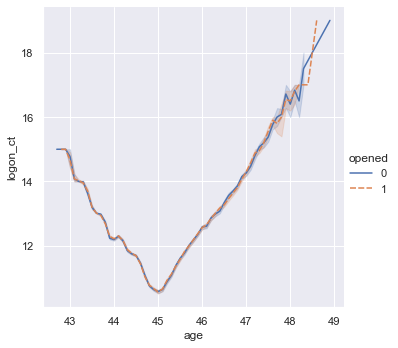

In [12]:
sns.relplot(data=final, x="age", y="logon_ct", kind="line", hue = 'opened', style = 'opened')

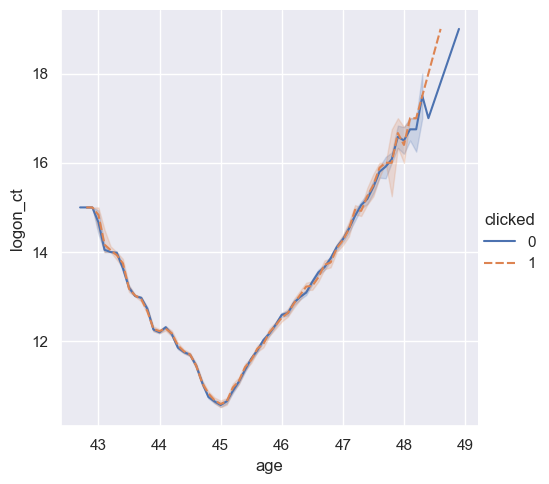

In [13]:
sns.relplot(data=final, x="age", y="logon_ct", kind="line", hue = 'clicked', style = 'clicked')

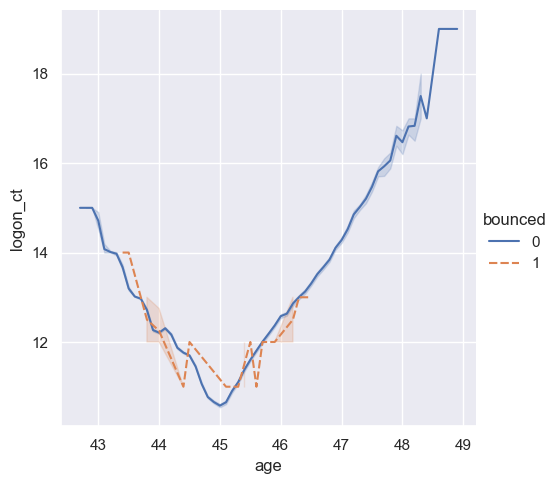

In [14]:
sns.relplot(data=final, x="age", y="logon_ct", kind="line", hue = 'bounced', style = 'bounced')

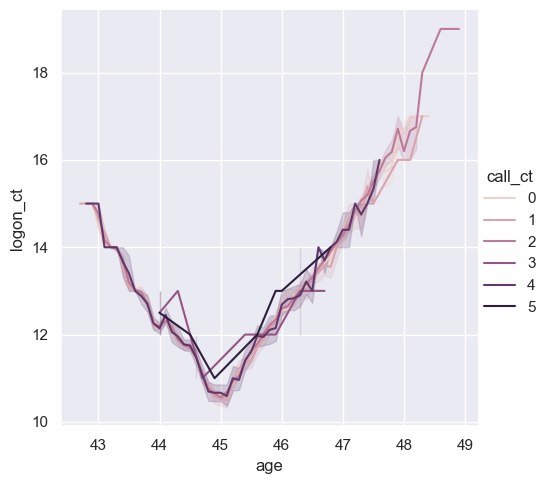

In [15]:
sns.relplot(data=final, kind="line", x="age", y="logon_ct", hue="call_ct")

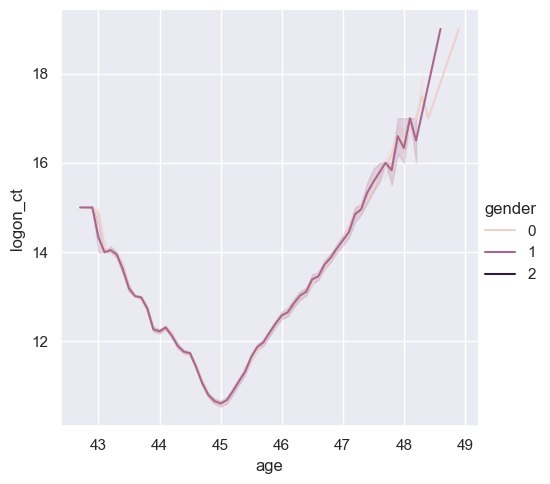

In [16]:
sns.relplot(data=final, kind="line", x="age", y="logon_ct", hue="gender")

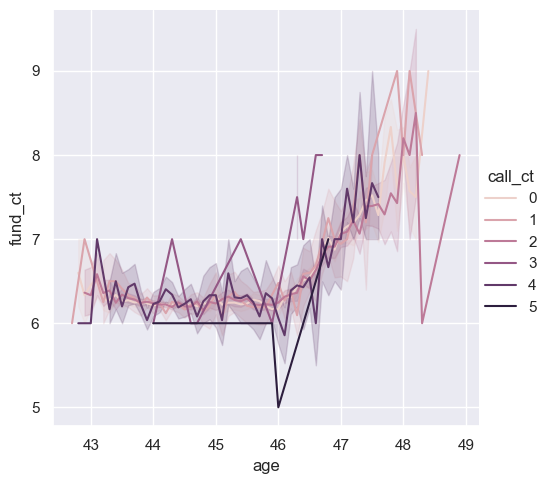

In [32]:
sns.relplot(data=final, kind="line", x="age", y="fund_ct", hue="call_ct")

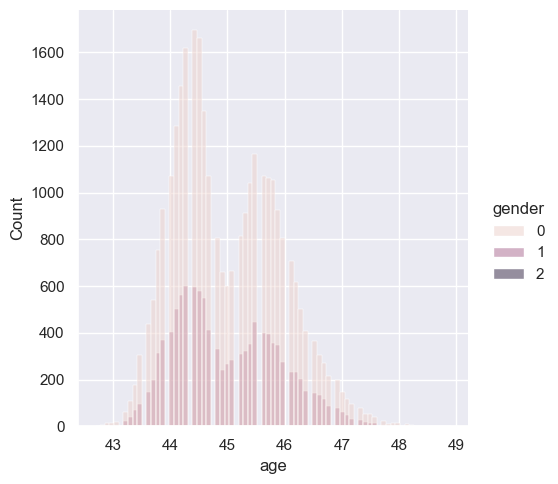

In [17]:
sns.displot(final, x="age", hue="gender")

<Axes: >

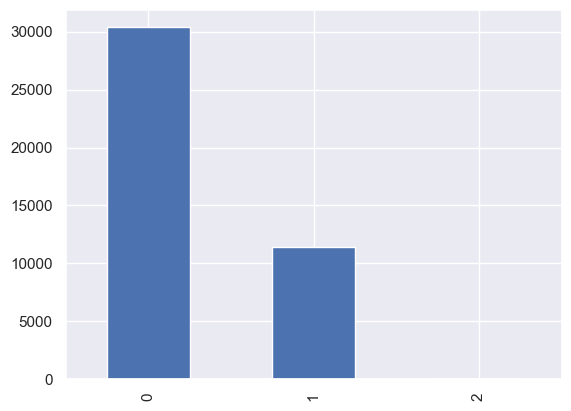

In [19]:
final['gender'].value_counts().plot.bar()

<Axes: >

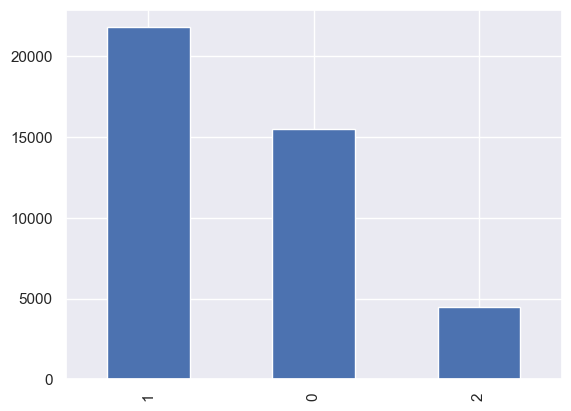

In [22]:
final['campaign'].value_counts().plot.bar()

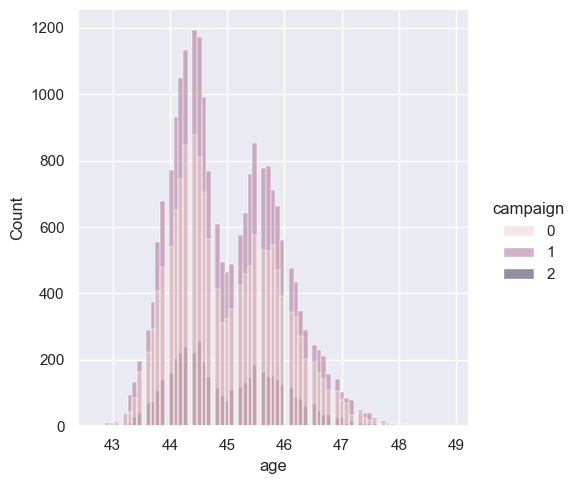

In [23]:
sns.displot(final, x="age", hue="campaign")

<Axes: xlabel='campaign'>

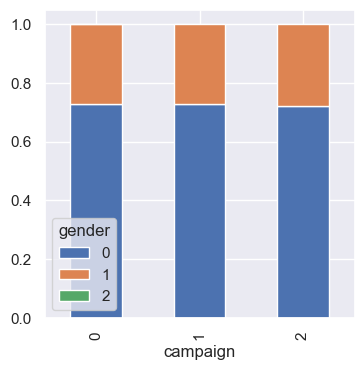

In [29]:
campaign = pd.crosstab(final['campaign'], final['gender'])
campaign.div(campaign.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='age'>

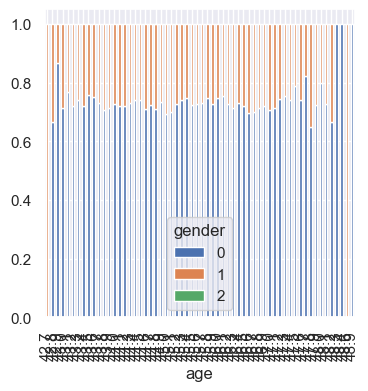

In [30]:
age = pd.crosstab(final['age'], final['gender'])
age.div(age.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))

<Axes: xlabel='status'>

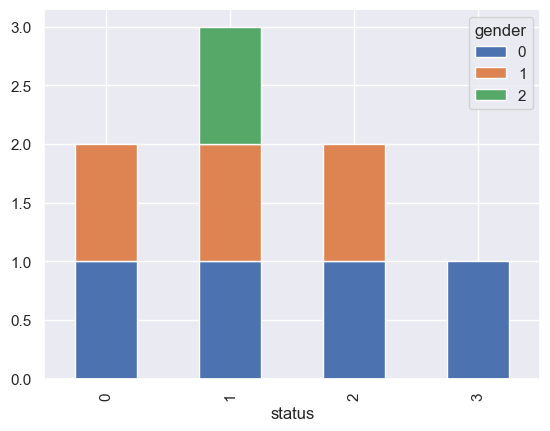

In [34]:
status = pd.crosstab(final['status'], final['gender'])
status.div(status.astype(float), axis = 0).plot(kind = 'bar', stacked = True)

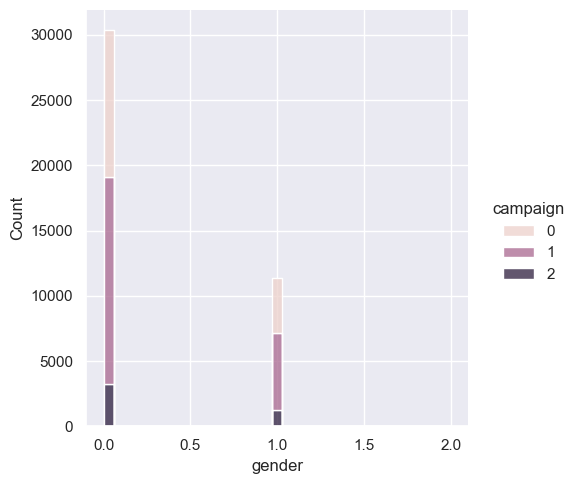

In [45]:
sns.displot(final, x="gender", hue="campaign", element = "step", multiple = "stack")

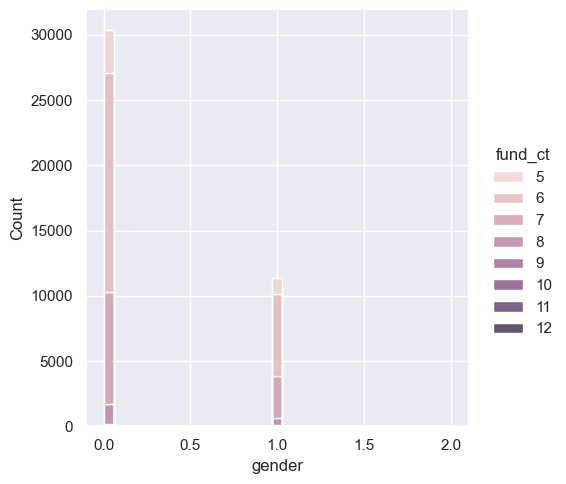

In [47]:
sns.displot(final, x="gender", hue="fund_ct", element = "step", multiple = "stack")

In [49]:
sns.relplot(data=final.query("gender" = "0"), kind="line", x="gender", y="fund_ct", hue="campaign")

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1528305992.py, line 1)

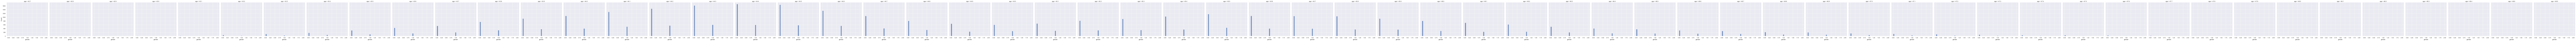

In [51]:
sns.displot(final, x="gender", col="age")

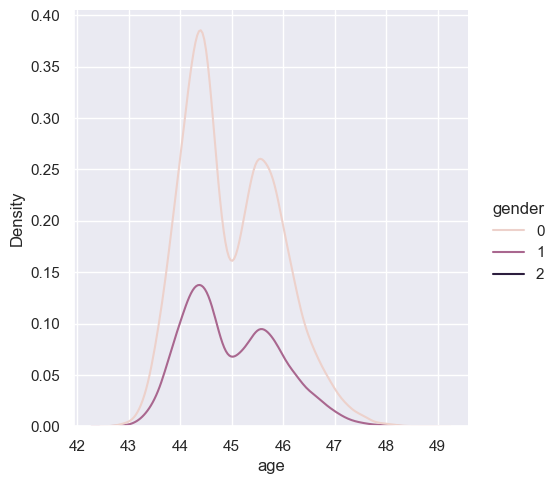

In [56]:
sns.displot(final, x="age", hue = "gender", kind="kde")

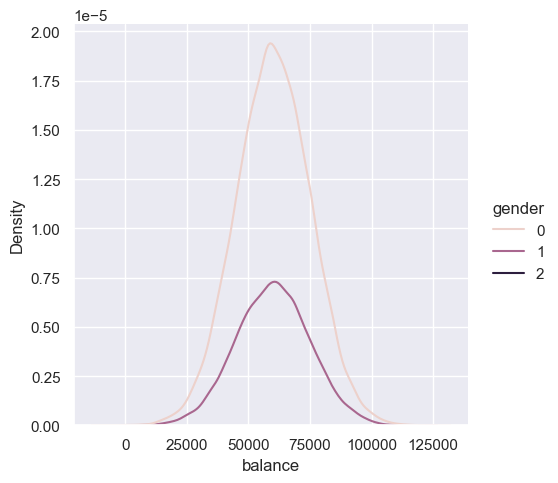

In [58]:
sns.displot(final, x="balance", hue = "gender", kind="kde")

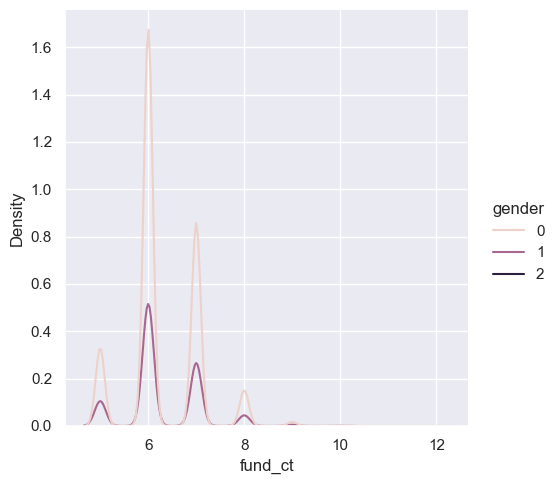

In [60]:
sns.displot(final, x="fund_ct", hue = "gender", kind="kde")

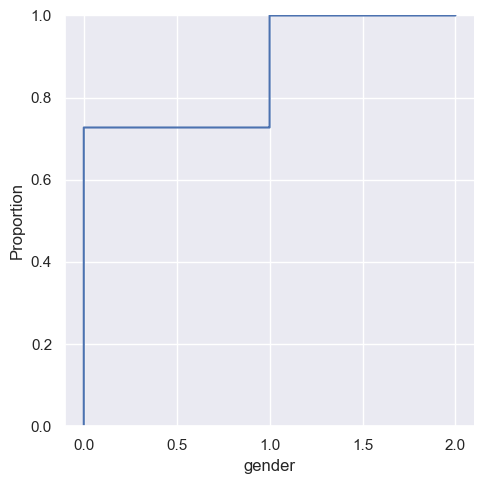

In [69]:
sns.displot(final, x="gender", kind="ecdf")

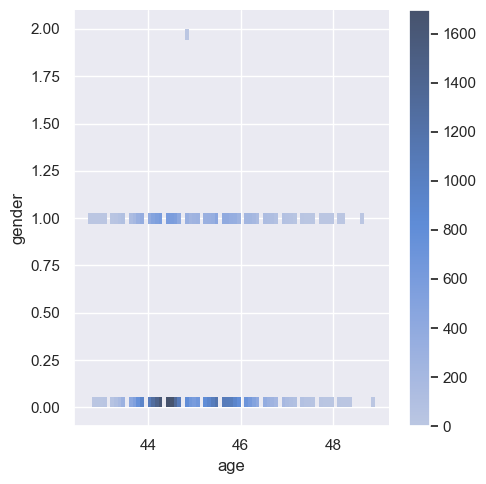

In [77]:
sns.displot(final, x="age", y="gender", cbar=True)

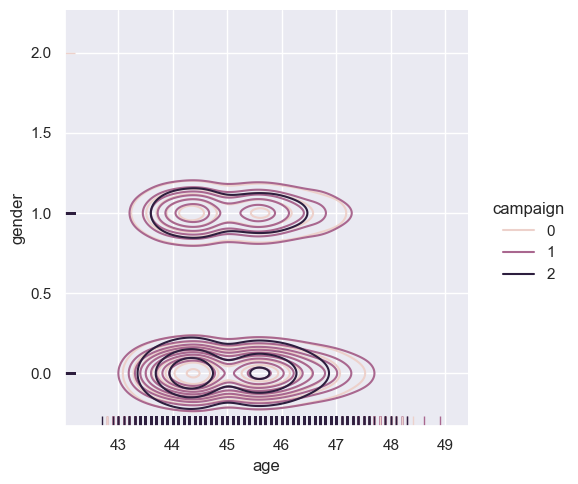

In [88]:
sns.displot(final, x="age", y="gender", hue = "campaign", kind = "kde", rug = True)

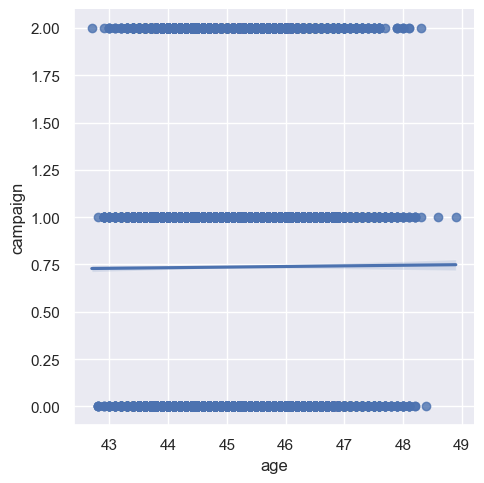

In [96]:
sns.lmplot(data = final, x="age", y="campaign");

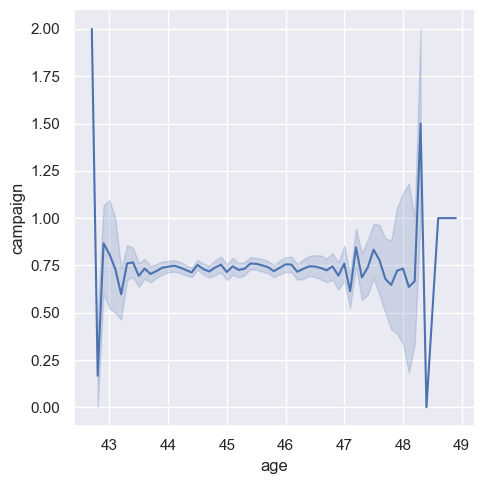

In [99]:
sns.relplot(data=final, kind="line", x="age", y="campaign")

<Axes: xlabel='gender,campaign,bounced'>

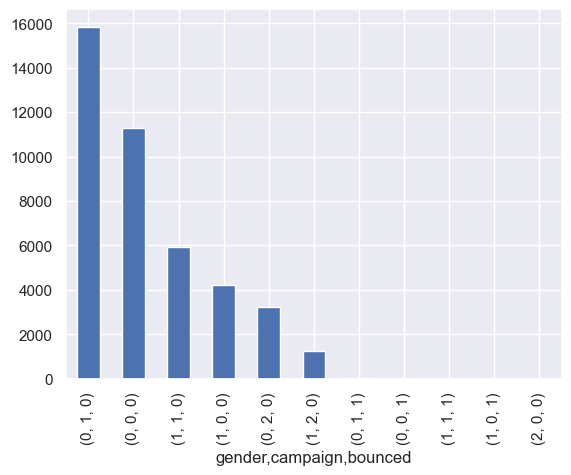

In [113]:
final[['gender', 'campaign', 'bounced']].value_counts().plot.bar()

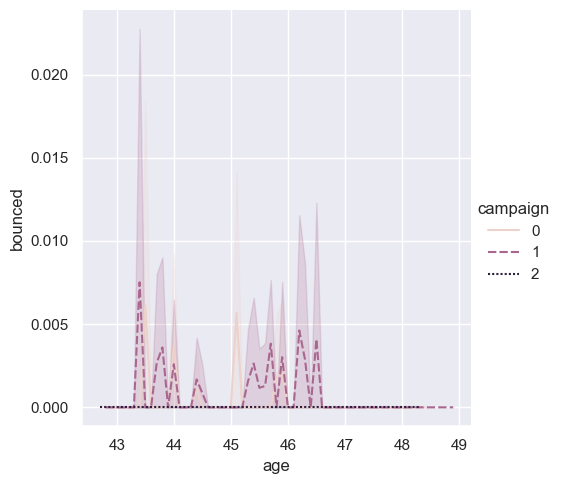

In [107]:
sns.relplot(data=final, x="age", y="bounced", kind="line", hue = 'campaign', style = 'campaign')

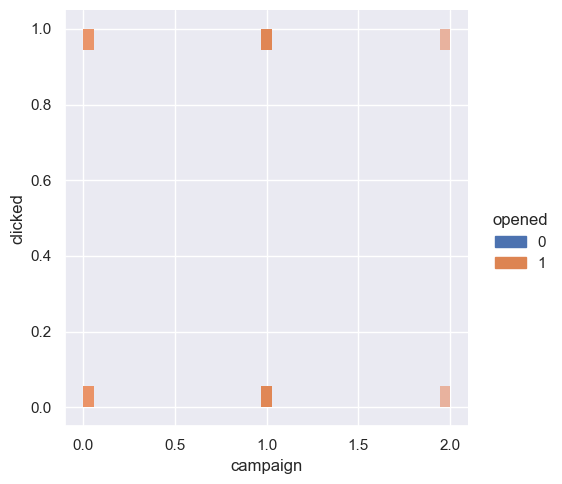

In [128]:
sns.displot(final, x="campaign", y = "clicked", hue="opened")

In [ ]:
sns.displot(final, x="campaign", hue="bounced", kind = "hist")

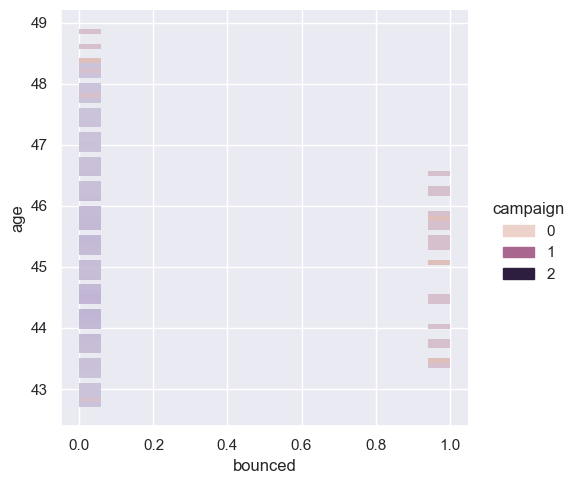

In [112]:
sns.displot(final, x="bounced", y="age", hue = "campaign")

ValueError: `multiple` must be one of ['layer', 'stack', 'fill', 'dodge'], but stacked was passed.`

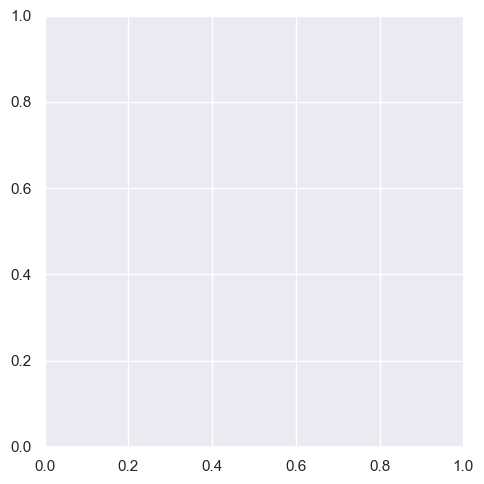

In [120]:
sns.displot(final, x="campaign", hue = "clicked", element = "step", multiple = "stacked")

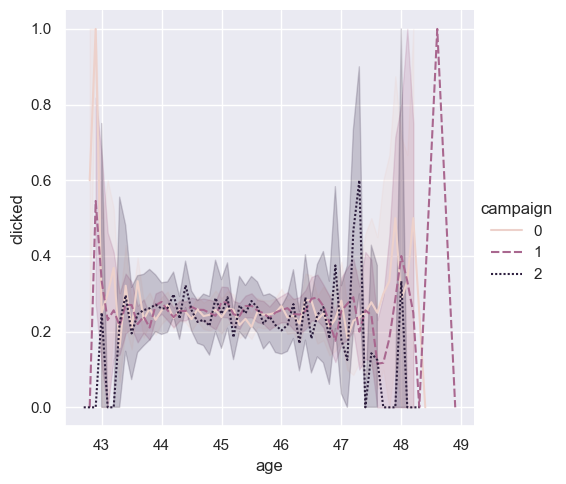

In [129]:
sns.relplot(data=final, x="age", y="clicked", kind="line", hue = 'campaign', style = 'campaign')

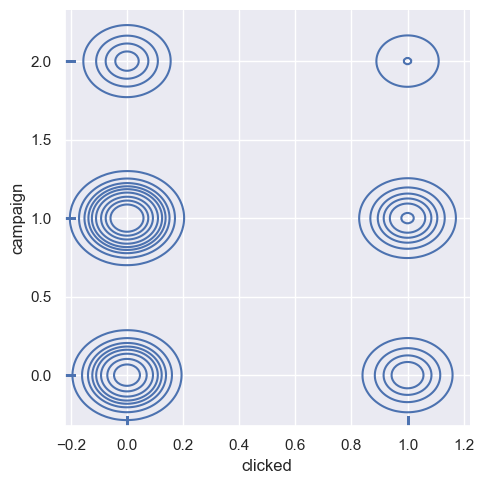

In [135]:
sns.displot(final, x="clicked", y="campaign", kind = "kde", rug = True)

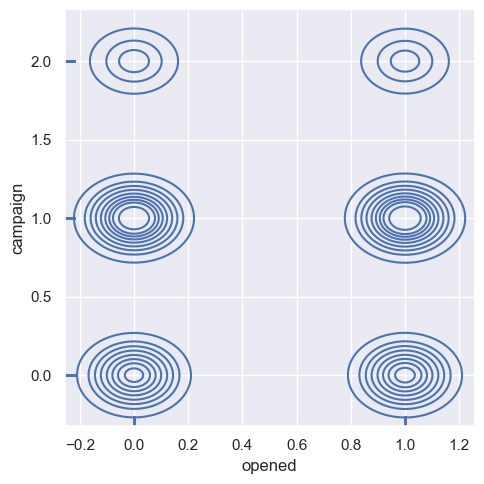

In [136]:
sns.displot(final, x="opened", y="campaign", kind = "kde", rug = True)

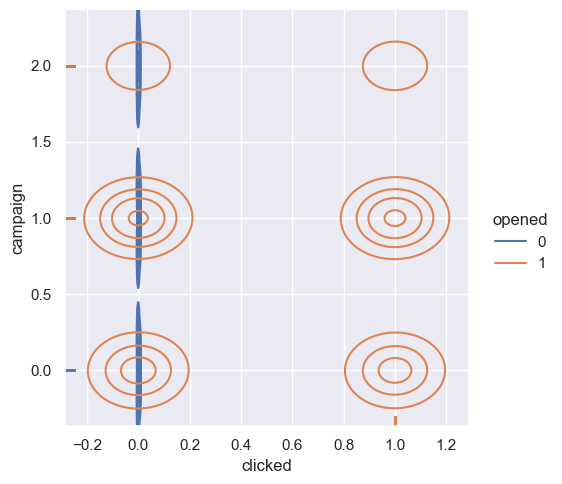

In [137]:
sns.displot(final, x="clicked", y="campaign", hue = "opened", kind = "kde", rug = True)

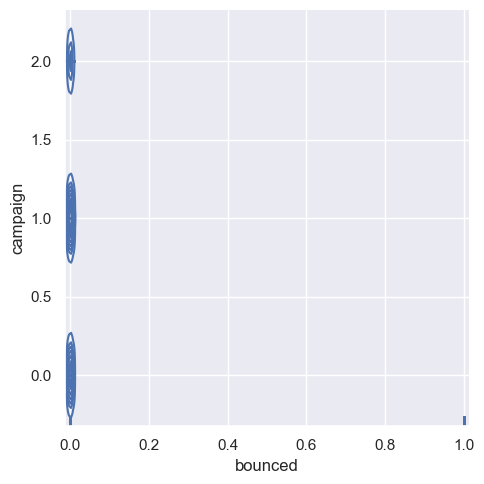

In [138]:
sns.displot(final, x="bounced", y="campaign", kind = "kde", rug = True)

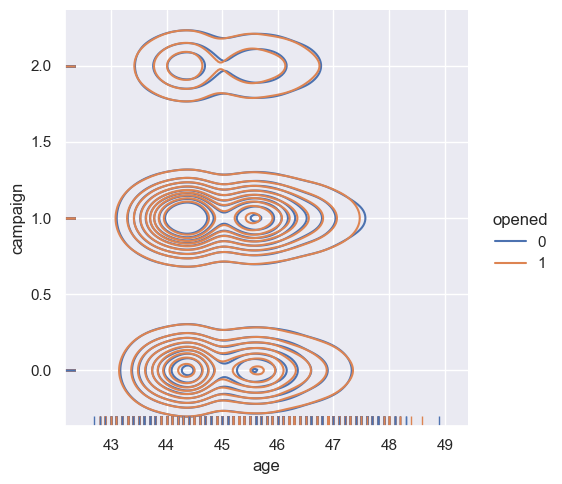

In [139]:
sns.displot(final, x="age", y="campaign", hue = "opened", kind = "kde", rug = True)

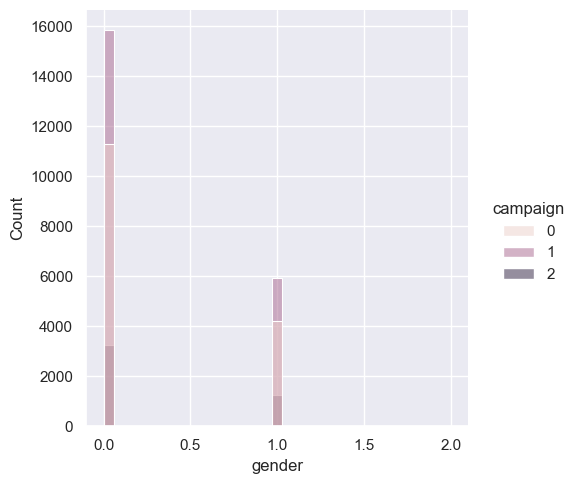

In [147]:
sns.displot(final, x="gender", hue="campaign")

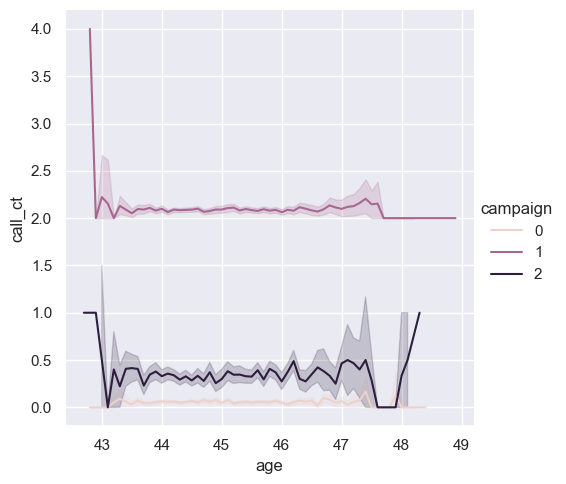

In [150]:
sns.relplot(data=final, kind="line", x="age", y="call_ct", hue="campaign")

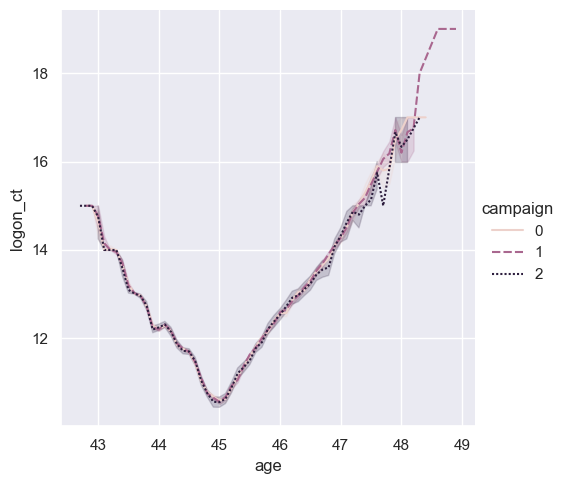

In [152]:
sns.relplot(data=final, kind="line", x="age", y="logon_ct", hue="campaign", style = "campaign")

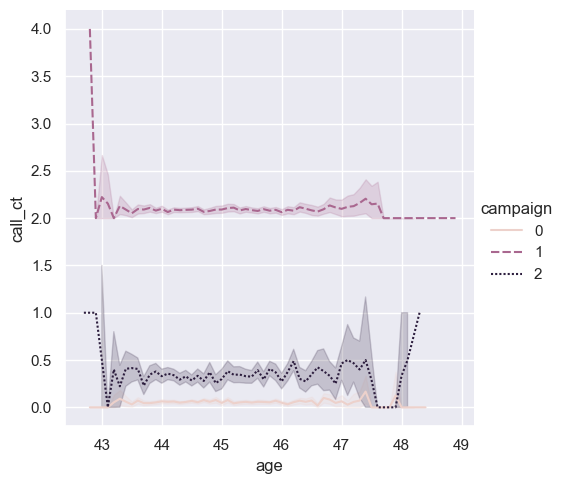

In [154]:
sns.relplot(data=final, kind="line", x="age", y="call_ct", hue="campaign", style = "campaign")

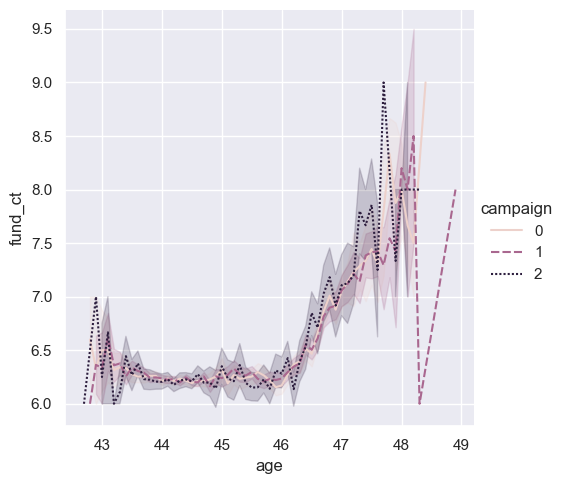

In [155]:
sns.relplot(data=final, kind="line", x="age", y="fund_ct", hue="campaign", style = "campaign")

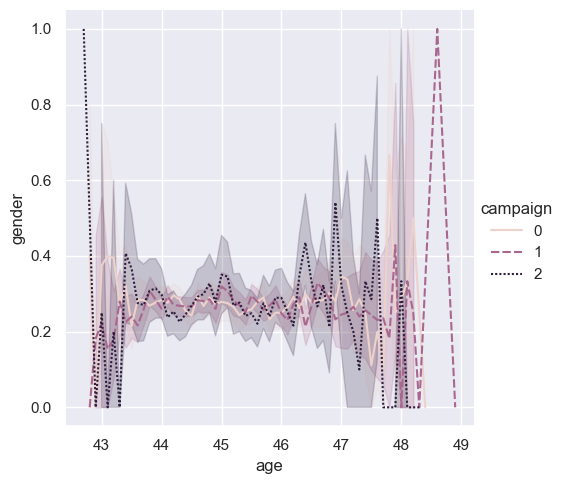

In [159]:
sns.relplot(data=final, kind="line", x="age", y = "gender", hue="campaign", style = "campaign")

<Axes: xlabel='age', ylabel='gender'>

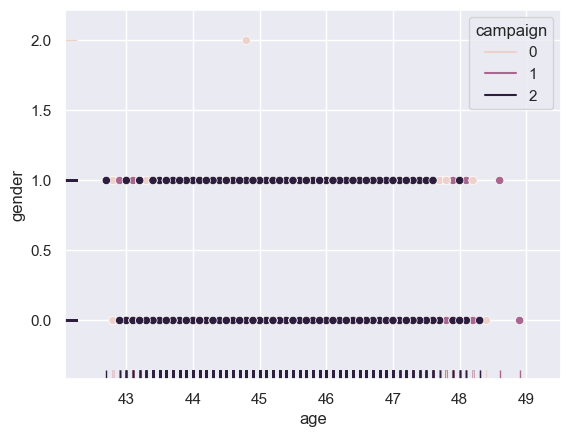

In [161]:
sns.scatterplot(data=final, x="age", y="gender", hue="campaign")
sns.rugplot(data=final, x="age", y="gender", hue="campaign")